In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-cancer/Thyroid_Diff.csv


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




Differentiated Thyroid Cancer Recurrence

Data source: Borzooei, S. & Tarokhian, A. (2023). Differentiated Thyroid Cancer Recurrence [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5632J.

In [8]:
data = pd.read_csv('/kaggle/input/thyroid-cancer/Thyroid_Diff.csv')

In [3]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [57]:
data.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [7]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder


In [52]:


# Encode categorical variables (e.g., Gender, Smoking, etc.)
label_encoder = LabelEncoder()

# Encode columns with categorical values
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoking'] = label_encoder.fit_transform(data['Smoking'])
data['Hx Smoking'] = label_encoder.fit_transform(data['Hx Smoking'])
data['Hx Radiothreapy'] = label_encoder.fit_transform(data['Hx Radiothreapy'])
data['Thyroid Function'] = label_encoder.fit_transform(data['Thyroid Function'])
data['Physical Examination'] = label_encoder.fit_transform(data['Physical Examination'])
data['Adenopathy'] = label_encoder.fit_transform(data['Adenopathy'])
data['Pathology'] = label_encoder.fit_transform(data['Pathology'])
data['Focality'] = label_encoder.fit_transform(data['Focality'])
data['Risk'] = label_encoder.fit_transform(data['Risk'])
data['Stage'] = label_encoder.fit_transform(data['Stage'])
data['Response'] = label_encoder.fit_transform(data['Response'])
data['Recurred'] = label_encoder.fit_transform(data['Recurred'])
data['T'] = label_encoder.fit_transform(data['T'])
data['N'] = label_encoder.fit_transform(data['N'])
data['M'] = label_encoder.fit_transform(data['M'])

# Check the data again after encoding
data.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [56]:
# Frequency of categorical variables
print(data['T'].value_counts())
print(data['N'].value_counts())
print(data['M'].value_counts())
print(data['Stage'].value_counts())
print(data['Response'].value_counts())
print(data['Recurred'].value_counts())
print(data['Focality'].value_counts())
print(data['Hx Radiothreapy'].value_counts())


T
2    151
3     96
0     49
1     43
5     20
4     16
6      8
Name: count, dtype: int64
N
0    268
2     93
1     22
Name: count, dtype: int64
M
0    365
1     18
Name: count, dtype: int64
Stage
0    333
1     32
4     11
2      4
3      3
Name: count, dtype: int64
Response
1    208
3     91
2     61
0     23
Name: count, dtype: int64
Recurred
0    275
1    108
Name: count, dtype: int64
Focality
1    247
0    136
Name: count, dtype: int64
Hx Radiothreapy
0    376
1      7
Name: count, dtype: int64


Key Variables:
T (Tumor Size/Extent):

T2 (most common), T3a, T1a are frequent.
Larger tumors (T3, T4) indicate higher recurrence risk.
N (Lymph Node Involvement):

N0 (no involvement) is common, while N1b and N1a indicate lymph node spread.
Lymph node involvement increases recurrence risk.

M (Metastasis):

M0 (no metastasis) is common, but M1 (distant metastasis) significantly increases recurrence risk.

 Stage:

Stage 0 (early, no recurrence), Stage 4 (advanced, higher recurrence risk).
Stage reflects a combination of T, N, and M.
Response to Treatment:

Response 1 (good response) lowers recurrence, while Response 3 (poor response) increases the likelihood of recurrence.
Recurred (Outcome):

The target variable for recurrence prediction: 108 cases of recurrence, 275 non-recurrence.

In [12]:
# Basic summary statistics
print(data.describe())

# Frequency of categorical variables
print(data['Gender'].value_counts())
print(data['Risk'].value_counts())
print(data['Stage'].value_counts())


              Age      Gender     Smoking  Hx Smoking  Hx Radiothreapy  \
count  383.000000  383.000000  383.000000  383.000000       383.000000   
mean    40.866841    0.185379    0.127937    0.073107         0.018277   
std     15.134494    0.389113    0.334457    0.260653         0.134126   
min     15.000000    0.000000    0.000000    0.000000         0.000000   
25%     29.000000    0.000000    0.000000    0.000000         0.000000   
50%     37.000000    0.000000    0.000000    0.000000         0.000000   
75%     51.000000    0.000000    0.000000    0.000000         0.000000   
max     82.000000    1.000000    1.000000    1.000000         1.000000   

       Thyroid Function  Physical Examination  Adenopathy   Pathology  \
count        383.000000            383.000000  383.000000  383.000000   
mean           1.950392              2.561358    2.924282    2.550914   
std            0.630917              1.350110    1.172106    0.890257   
min            0.000000              0.00

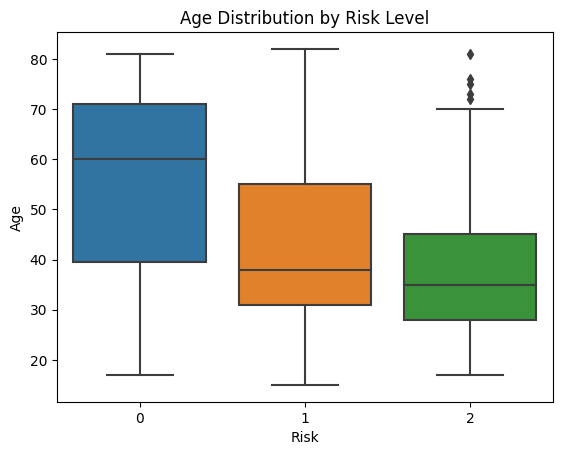

In [17]:
# Age distribution based on Risk
sns.boxplot(x='Risk', y='Age', data=data)
plt.title('Age Distribution by Risk Level')
plt.show()


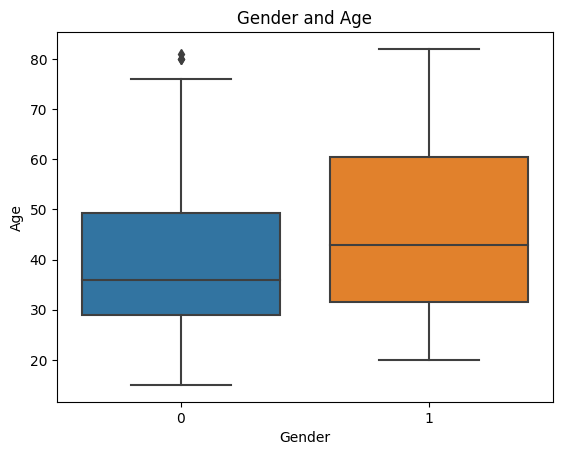

In [30]:
# Age distribution based on Risk
sns.boxplot(x='Gender', y='Age', data=data)
plt.title('Gender and Age')
plt.show()

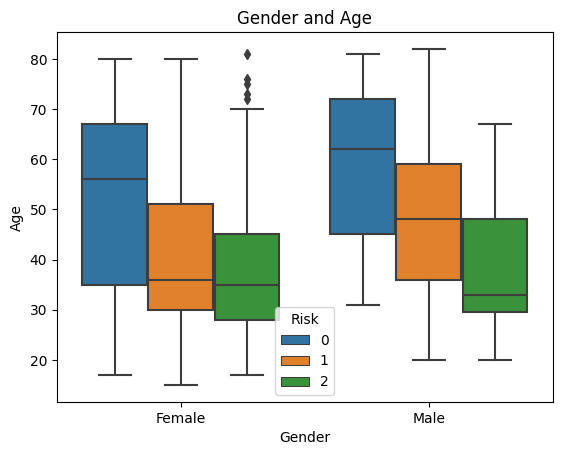

In [33]:
# Age,gender distribution based on Risk
data['Gender'] = data['Gender'].map({0: 'Female', 1: 'Male'})
sns.boxplot(x='Gender', y='Age', hue='Risk', data=data)
plt.title('Gender and Age')
plt.show()

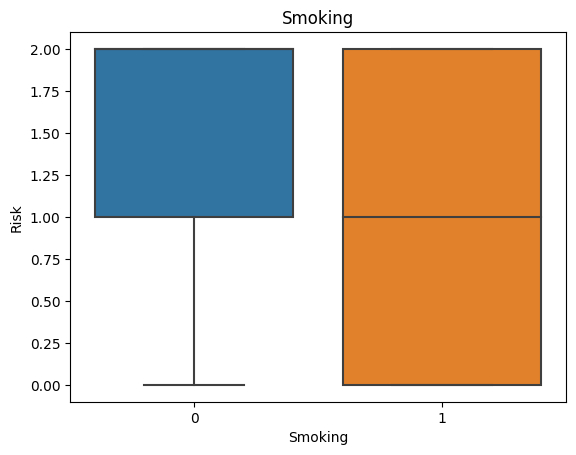

In [37]:
# Smoking
sns.boxplot(x='Smoking', y='Risk', data=data)
plt.title('Smoking')
plt.show()

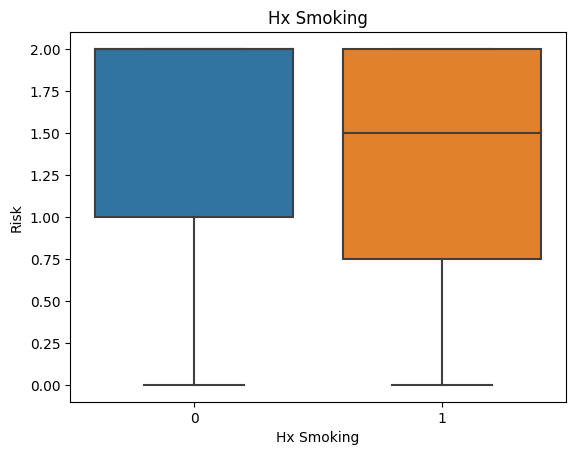

In [39]:
# Hx Smoking
sns.boxplot(x='Hx Smoking', y='Risk', data=data)
plt.title('Hx Smoking')
plt.show()



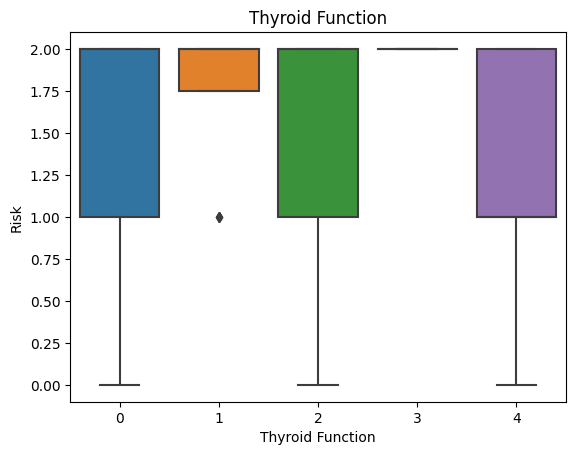

In [40]:
# thyroid function
sns.boxplot(x='Thyroid Function', y='Risk', data=data)
plt.title('Thyroid Function')
plt.show()

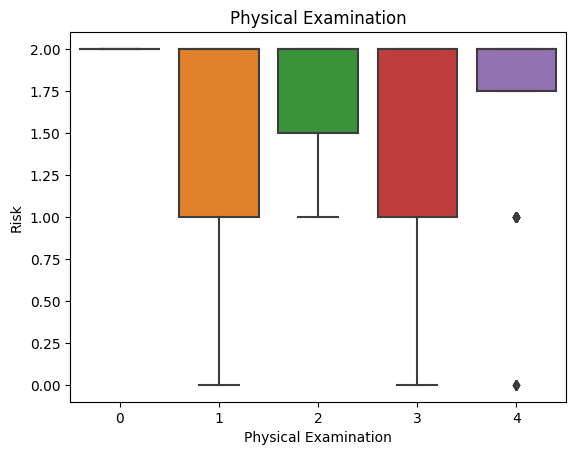

In [41]:
# Physical Examination
sns.boxplot(x='Physical Examination', y='Risk', data=data)
plt.title('Physical Examination')
plt.show()

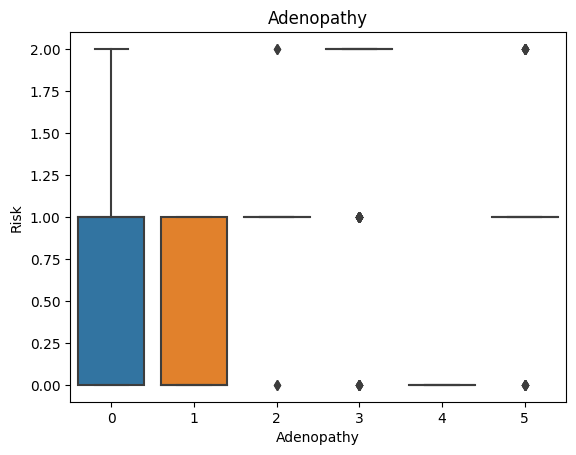

In [42]:
# Adenopathy
sns.boxplot(x='Adenopathy', y='Risk', data=data)
plt.title('Adenopathy')
plt.show()

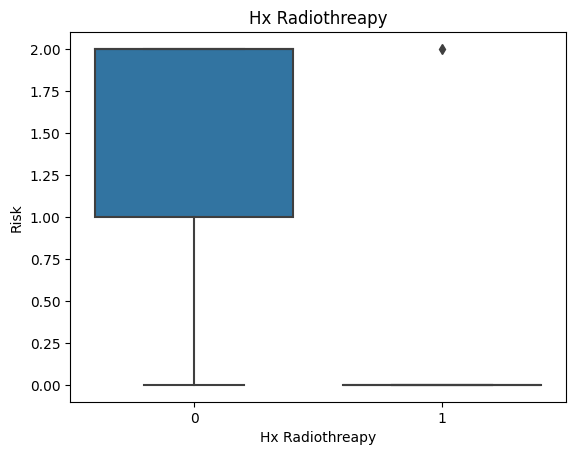

In [55]:
# Hx Radiothreapy
sns.boxplot(x='Hx Radiothreapy', y='Risk', data=data)
plt.title('Hx Radiothreapy')
plt.show()

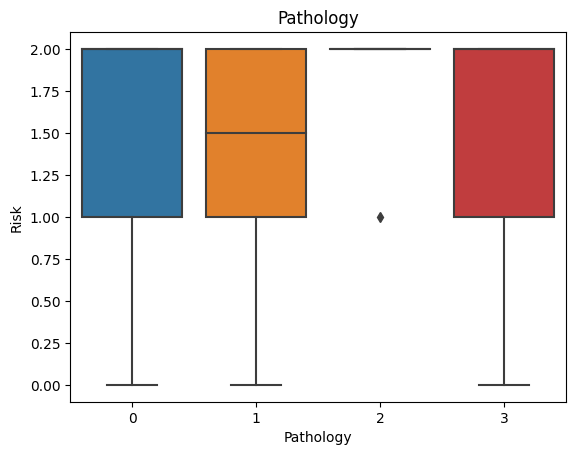

In [43]:
# Pathology
sns.boxplot(x='Pathology', y='Risk', data=data)
plt.title('Pathology')
plt.show()

In [27]:
risk_counts = data['Risk'].value_counts()

# Display the counts for each unique value in the 'Risk' column
print(risk_counts)
# imbalanced dataset 

Risk
2    249
1    102
0     32
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.88      0.81      0.85        27
           2       0.95      0.97      0.96        78

    accuracy                           0.93       115
   macro avg       0.91      0.90      0.90       115
weighted avg       0.93      0.93      0.93       115



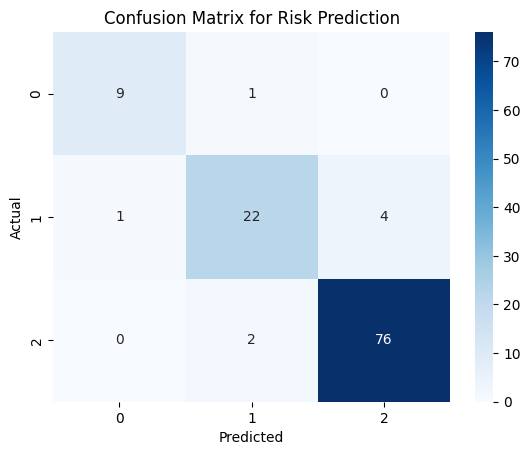

In [58]:
# Logistic Regression
# Select the features and target variable
X = data[['Age', 'Gender', 'Smoking', 'Hx Radiothreapy','N', 'T','M', 'Stage','Response',]]
y = data['Risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Risk Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
